In [1]:

import pandas as pd

import re
import numpy as np
import struct
import math

from functions_aux import *

import seaborn as sns
import matplotlib.pyplot as plt

sensors = ["accelerometer","cellular","gps","gyroscope","magnetometer"]
cols_acc = ["idsession","second","accx","accy","accz"]

data = pd.DataFrame(columns=cols_acc)

- Downlaod SMC
- Unzip
- Convert to SQL

In [2]:
trayecto = set()
path = "./InputFiles"
files = os.listdir(path)

for file in files:
    trayecto.add(file)
    print(trayecto)

{'sensemycity_46008_BUS_USER469.zip'}


In [3]:
unzip_files()

In [4]:
sensor_files = get_sensor_files()
acc,gyro,gps,mag,cell = read_sensors(sensor_files)

In [7]:
data = get_acc_df(acc)
data.head()

,idsession,second,accx,accy,accz
0,46008,55872,"[0.76953125, 0.8359375, 0.51171875, 0.2890625,...","[8.08203125, 7.88671875, 7.65625, 7.86328125, ...","[5.3125, 5.734375, 6.0625, 5.72265625, 5.51953..."
1,46008,55873,"[0.34765625, 0.45703125, 0.31640625, 0.2851562...","[7.796875, 7.87109375, 7.88671875, 7.8671875, ...","[5.6171875, 5.4453125, 5.1328125, 5.23828125, ..."
2,46008,55874,"[0.1796875, 0.16015625, 0.16015625, 0.13671875...","[8.01171875, 8.04296875, 8.14453125, 8.234375,...","[6.1171875, 6.04296875, 5.78125, 5.91796875, 6..."
3,46008,55875,"[0.6796875, 0.61328125, 0.66015625, 0.65625, 0...","[6.3984375, 7.09765625, 7.1171875, 7.26953125,...","[7.69921875, 6.71484375, 6.9375, 7.61328125, 7..."
4,46008,55876,"[1.046875, 1.171875, 1.1875, 1.17578125, 1.128...","[7.28515625, 7.4375, 7.52734375, 7.5703125, 7....","[7.21875, 7.59765625, 7.79296875, 7.8671875, 7..."


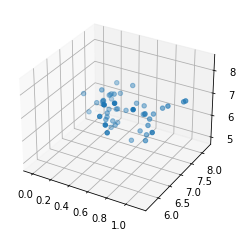

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

instance = 2

ax.scatter(data.accx[instance], data.accy[instance], data.accz[instance])

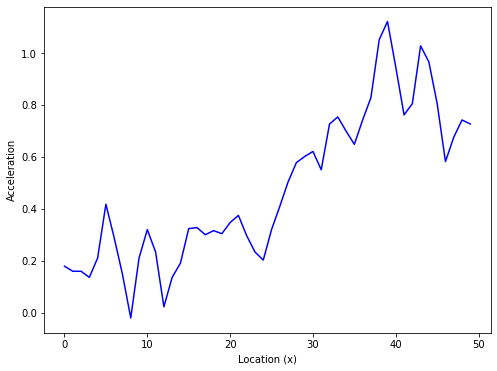

In [9]:
x = range(0,len(data.accx[instance]))
y = data.accx[instance]

plt.figure(figsize = (8, 6))
plt.plot(x, y, 'b')
plt.ylabel('Acceleration')
plt.xlabel('Location (x)')
plt.show()

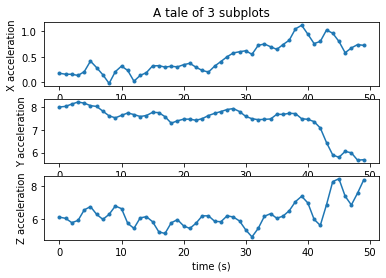

In [10]:
import matplotlib.pyplot as plt

x = range(0,len(data.accx[instance]))

x_accel = data.accx[instance]
y_accel = data.accy[instance]
z_accel = data.accz[instance]

plt.subplot(3, 1, 1)
plt.plot(x, x_accel, '.-')
plt.title('A tale of 3 subplots')
plt.ylabel('X acceleration')

plt.subplot(3, 1, 2)
plt.plot(x, y_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(x, z_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.show()

# Calculating features of acceleration based on the 1 second windows
<a class="anchor" id="acc"></a>

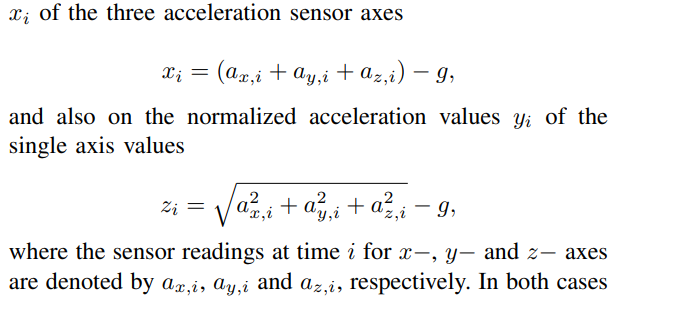

In [11]:
import statistics as stats
import numpy as np
# accx accy accz son arrays
def get_acc_features(accx,accy,accz):
    x = [] #Suma de componentes menos gravedad
    z = [] #Suma de cuadrados
    for i in range(len(accx)):
        x.append(accx[i] + accy[i] + accz[i] - 9.8)
        z.append(math.sqrt(pow(accx[i],2) + pow(accy[i],2) + pow(accz[i],2))-9.8)        
    return x,z,stats.mean(x),stats.mean(z),np.std(x),np.std(z),np.percentile(x,99),np.percentile(z,99)
    
x1,z1,xavg,zavg,stdx,stdz,px,pz = get_acc_features(x_accel,y_accel,z_accel)

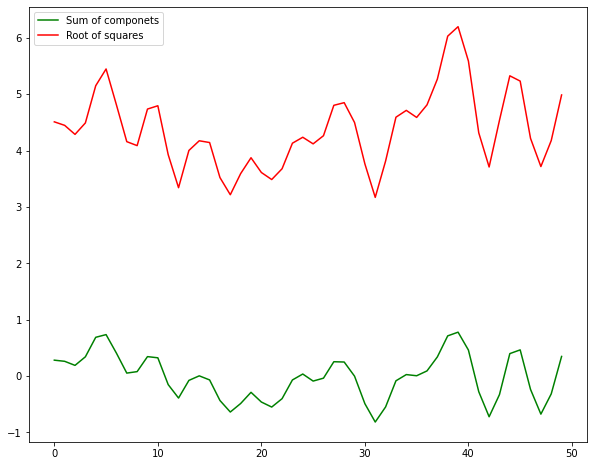

In [12]:
x = range(0,len(data.accx[instance]))
y = z1
z = x1

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'g',label='Sum of componets')
plt.plot(x,z,'r',label='Root of squares')
#plt.ylabel('Acceleration')
#plt.xlabel('Moment (x)')
plt.legend()
plt.show()

## Window extraction
Features for the accelerometer:
- start second
- x = sum of components[]
- z = sum of sqares[]
- media of x
- media of z
- standard deviation
- 99 pecentile


In [13]:

    
windows = window_extraction(data,10,0)
df_win = dataset_generate(windows)
df_win.head()

,media_x,sum_values,std_x,second,square_values,p99_x,p99_z,std_z,media_z
0,4.599353,"[4.364062499999999, 4.657031249999999, 4.43046...",0.616972,55872,"[-0.09772894005207178, -0.013162881393560255, ...",6.462656,1.178319,0.335064,-0.041929
1,-3.385273,"[4.926562499999999, 4.676562499999999, 4.37187...",6.393753,55882,"[0.12141823505701588, -0.05711553966578897, -0...",9.209336,12.039121,2.645385,0.307372
2,-2.686758,"[-7.487500000000001, -6.401562500000001, -6.12...",4.911039,55892,"[0.4865188223432444, -0.19801637162355057, -0....",10.235117,5.234946,1.111572,0.028713
3,-0.962180,"[3.2234374999999993, 3.3640624999999993, 3.246...",3.800337,55902,"[-0.37850883089044274, -0.34027703140424315, -...",9.227578,2.701390,0.921056,0.052650
4,-4.777366,"[-4.596875000000001, -3.2882812500000007, -3.3...",1.514975,55912,"[0.11139333158751619, 1.134382228625432, 0.653...",-0.971875,4.102171,1.404197,0.106206


# Extraction of gps features
- using geopandas

In [14]:
gps.head(10)

,session_id,seconds,millis,gpstime,gpsmillis,nsats,geo,lat,lon,alt,track,speed,climb,acc
0,46008,55876,721,1651101892,0,4,0101000020E61000005B26050E4FD620C0E5720F4BFB19...,40.202981,-8.418572,189.719,272.0,3.79,NaN,25.31130
1,46008,55877,724,1651101893,0,5,0101000020E61000008E1B448C53D620C0159691DDF919...,40.202938,-8.418606,164.336,137.0,0.69,NaN,9.06183
2,46008,55878,730,1651101894,0,7,0101000020E610000087F22EAC55D620C0E50A1081FA19...,40.202957,-8.418622,159.765,243.0,0.17,NaN,6.34370
3,46008,55879,724,1651101895,0,3,0101000020E6100000DAE8F75855D620C062F3B389FA19...,40.202958,-8.418620,159.209,0.0,0.00,NaN,9.11260
4,46008,55880,726,1651101896,0,5,0101000020E61000009949B3FD54D620C0203681B7FA19...,40.202964,-8.418617,159.100,0.0,0.00,NaN,8.40236
5,46008,55881,721,1651101897,0,5,0101000020E6100000B712150555D620C08CE58EE5FA19...,40.202969,-8.418617,159.558,0.0,0.00,NaN,7.81766
6,46008,55882,728,1651101898,0,3,0101000020E6100000EC9FE91D55D620C0DF7C9710FB19...,40.202974,-8.418618,158.322,0.0,0.00,NaN,6.66180
7,46008,55883,728,1651101899,0,3,0101000020E61000006FD6E07D55D620C0DF7C9710FB19...,40.202974,-8.418621,157.157,0.0,0.00,NaN,5.78438
8,46008,55884,721,1651101900,0,3,0101000020E61000002DFBBF3456D620C0F1FA4821FB19...,40.202976,-8.418626,156.937,0.0,0.00,NaN,5.55097
9,46008,55885,732,1651101901,0,3,0101000020E61000004527321057D620C079C74A48FB19...,40.202981,-8.418633,156.008,0.0,0.00,NaN,5.29209


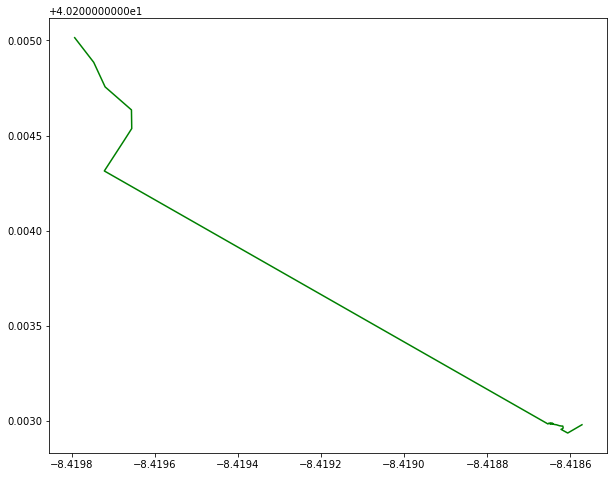

In [15]:
plt.figure(figsize = (10, 8))
plt.plot(gps['lon'].values.tolist(), gps['lat'].values.tolist(), 'g',label='Sum of componets')
#plt.plot(x,z,'r',label='Root of squares')
#plt.legend()
plt.show()

In [16]:
import geopandas
import folium

map1 = folium.Map(
    location=[gps["lat"][0],gps["lon"][0]],
    tiles='cartodbpositron',
    zoom_start=20,
)

locations = []

for index,row in gps.iterrows():
    locations.append((row['lat'],row['lon']))

line = folium.vector_layers.PolyLine(locations)
line.add_to(map1)

In [17]:
map1

In [18]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371000 # Radius of earth in meters. Use 3956 for miles. Determines return value units.
    return c * r

def get_distances(points):
    distances = []
    for pair in range(len(points)):
        if pair<len(points)-1:
            distances.append(haversine(points[pair][0],points[pair][1],points[pair+1][0],points[pair+1][1]))
    return distances

spds = get_distances(locations)
spds

[6.123574309073383,
 2.800881197079497,
 0.2981301749312963,
 0.6724398610785611,
 0.6043776109688705,
 0.5702513011144916,
 0.31801749023013803,
 0.6443332773689499,
 0.8890772255737205,
 0.6417318684947643,
 0.741146856331281,
 0.49949499485951215,
 0.01966606862817006,
 0.1870242641255704,
 0.15652961461713735,
 0.29151161465914466,
 0.6183609704161777,
 0.5248646418816295,
 0.3265784331961492,
 0.24466840330241554,
 0.1192553962415488,
 0.4382630287485323,
 188.2793714924422,
 18.395185272035175,
 7.1703478421338716,
 10.775505643075173,
 15.036448877941579,
 14.513185757926973,
 15.125854422545796]